In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tarfile import XGLTYPE
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
data_1 = pd.read_excel("./Real_Estate_Top5_2020-2022.xlsx")
data_1.drop(labels=['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '번지', '본번', '부번'], axis=1, inplace=True)
data_1.dropna(axis=0, inplace=True)
#data_1.reset_index(drop=True, inplace=True)
data_1 = data_1.drop_duplicates(keep='first')
data_1.reset_index(drop=True, inplace=True)
data_1

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,10,188200,10,2020,개포로 264
1,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,12,193000,4,2020,개포로 264
2,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,16,195000,17,2020,개포로 264
3,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,26,195000,17,2020,개포로 264
4,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202012,23,193000,5,2020,개포로 264
...,...,...,...,...,...,...,...,...,...
18161,서울특별시 중구 황학동,롯데캐슬,59.91,202212,24,63000,13,2008,청계천로 400
18162,서울특별시 중구 황학동,롯데캐슬,84.97,202212,26,85000,22,2008,청계천로 400
18163,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202206,9,225000,29,2011,소공로 35
18164,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202208,2,205000,20,2011,소공로 35


In [3]:
data_2 = pd.read_excel("./External_data_total.xlsx")
data_2.drop(['Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1,inplace=True)
data_2.dropna(axis=0, inplace=True)

In [4]:
data_2_index = data_2['계약년월']

In [5]:
data_2_tr = data_2.transpose()

In [6]:
data_2_tr.columns = ['건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)',
       '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)',
       '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', 'S&P 500_close',
       'S&P 500_change_rate', 'NASDAQ_close', 'NASDAQ_change_rate',
       'DOW Jones_close', 'DOW Jones_change_rate', 'KRX300_close',
       'KRX300_change_rate', 'KOSPI_close', 'KOSPI_change_rate',
       'KOSDAQ_close', 'KOSDAQ_change_rate']
data_2_tr.drop(labels='계약년월', axis = 0, inplace=True)

In [7]:
add_data = []

for i in range(len(data_1)):
    index_value = data_1['계약년월'][i]
    if index_value in data_2_tr.index:
        add_data.append(data_2_tr.loc[index_value])

data_3 = pd.DataFrame(add_data)
data_3 = data_3.reset_index(drop=True)

data_3 = pd.concat([data_1, data_3], axis=1)

In [8]:
data = data_3
data

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,건설수주_건축(단위 백만원),...,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
0,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,10,188200,10,2020,개포로 264,"10,094,921",...,11435.234109,0.031253,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
1,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,12,193000,4,2020,개포로 264,"10,094,921",...,11435.234109,0.031253,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
2,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,16,195000,17,2020,개포로 264,"13,510,590",...,11794.461523,0.031414,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
3,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,26,195000,17,2020,개포로 264,"13,510,590",...,11794.461523,0.031414,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
4,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202012,23,193000,5,2020,개포로 264,"22,231,493",...,12619.050914,0.069913,30148.579901,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18161,서울특별시 중구 황학동,롯데캐슬,59.91,202212,24,63000,13,2008,청계천로 400,"14,731,854",...,10838.995815,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89
18162,서울특별시 중구 황학동,롯데캐슬,84.97,202212,26,85000,22,2008,청계천로 400,"14,731,854",...,10838.995815,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89
18163,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202206,9,225000,29,2011,소공로 35,"19,081,016",...,11418.919085,-0.034727,31446.712798,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56
18164,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202208,2,205000,20,2011,소공로 35,"13,709,893",...,12570.260403,0.081533,33009.564878,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43


In [9]:
# object -> float 형으로 데이터타입 변환('단지명', '도로명' 제외)

# 숫자형으로 변환만 진행
data['매매가격지수(아파트)'] = data['매매가격지수(아파트)'].astype(float)
data['경제활동인구_ 실업률(단위: %)'] = data['경제활동인구_ 실업률(단위: %)'].astype(float)
data['경제활동인구_고용률(단위: %)'] = data['경제활동인구_고용률(단위: %)'].astype(float)
data['예금은행 대출금리(신규취급액 기준)_대출평균(연%)'] = data['예금은행 대출금리(신규취급액 기준)_대출평균(연%)'].astype(float)
data['예금은행 대출금리(잔액 기준)_총대출(연리%)'] = data['예금은행 대출금리(잔액 기준)_총대출(연리%)'].astype(float)
data['소비자물가지수_총지수(가중치:1000?)'] = data['소비자물가지수_총지수(가중치:1000?)'].astype(float)
data['경기종합지수'] = data['경기종합지수'].astype(float)

# 데이터 값들 사이에 ',' 제거 후 타입 변환
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)

CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)

current_balance = data['경상수지(백만불)']
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)

trade_balance = data['무역수지(백만불)']
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)

loan_amount = data['대출금액(아파트)(억원)']
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)

loan_balance = data['대출잔액(아파트)(억원)']
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)

new_pre_sale= data['서울_신규_분양세대(단위: 세대)']
for i in range(len(data)):
    new_pre_sale = new_pre_sale.apply(lambda x: pd.to_numeric(x.replace(',', ''), errors='coerce') if isinstance(x, str) and ',' in x else x)
data['서울_신규_분양세대(단위: 세대)'] = new_pre_sale

employed_person = data['경제활동인구_취업자(단위: 천명)']
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)

KOSPI = data['국제 주요국 주가지수(KOSPI)']
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)

KB_seoul = data['주택매매가격지수(KB)_서울']
KB_seoul_comma_removed = KB_seoul.apply(lambda x: x.replace(',', ''))
data['주택매매가격지수(KB)_서울'] = KB_seoul_comma_removed.astype(float)

KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [10]:
data_date_list = []

for index, row in data.iterrows():
    year_month = str(row['계약년월'])
    day = str(row['계약일']).zfill(2)
    data_date = year_month + day
    data_date_list.append(data_date)

print(data_date_list)

['20201010', '20201012', '20201116', '20201126', '20201223', '20200117', '20200212', '20200213', '20200221', '20200311', '20200414', '20200422', '20200504', '20200504', '20200513', '20200519', '20200604', '20200607', '20200608', '20200617', '20200623', '20200626', '20200629', '20200629', '20200702', '20200706', '20200708', '20200708', '20200709', '20200712', '20200716', '20200722', '20200730', '20200808', '20200808', '20200811', '20200909', '20201024', '20201025', '20201027', '20201027', '20201031', '20201204', '20201207', '20201216', '20201227', '20200104', '20200511', '20200520', '20200526', '20200530', '20200609', '20200613', '20200613', '20200613', '20200616', '20200619', '20200620', '20200620', '20200621', '20200621', '20200622', '20200622', '20200622', '20200622', '20200622', '20200622', '20200820', '20201031', '20200219', '20200620', '20200620', '20200621', '20200220', '20200229', '20200523', '20200605', '20200616', '20200624', '20200721', '20200723', '20200821', '20200923', '20

In [11]:
data_date = []

for i in range(len(data_date_list)):
    data_date.append(data_date_list[i][:4])

print(data_date)

['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020',

In [12]:
data_date_modified = pd.DataFrame({'계약연도': data_date})
data_date_modified

,계약연도
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
18161,2022
18162,2022
18163,2022
18164,2022


In [13]:
data = pd.concat([data, data_date_modified], axis=1)

In [14]:
data_cost_per_pyeong = data['거래금액(만원)']/(data['전용면적(㎡)']/3.30579)

In [15]:
data_cost_per_pyeong = pd.DataFrame({'평당가' : data_cost_per_pyeong})
data = pd.concat([data, data_cost_per_pyeong], axis=1)

In [16]:
data = data.drop(labels=['계약년월', '계약일', '전용면적(㎡)', '거래금액(만원)'],axis=1)

In [17]:
gu = data['시군구'].str.split()
gu

0         [서울특별시, 강남구, 개포동]
1         [서울특별시, 강남구, 개포동]
2         [서울특별시, 강남구, 개포동]
3         [서울특별시, 강남구, 개포동]
4         [서울특별시, 강남구, 개포동]
                ...        
18161      [서울특별시, 중구, 황학동]
18162      [서울특별시, 중구, 황학동]
18163    [서울특별시, 중구, 회현동1가]
18164    [서울특별시, 중구, 회현동1가]
18165    [서울특별시, 중구, 회현동1가]
Name: 시군구, Length: 18166, dtype: object

In [18]:
gu_each = []
for i in range(len(data)):
    gu_each.append(gu[i][1])

In [19]:
gu_each = pd.DataFrame({'매칭구' : gu_each})
data = pd.concat([data, gu_each], axis=1)
data = data.drop(labels=['시군구', '도로명'],axis=1)

In [20]:
apt_brand = []

for i in range(len(data)):
    if "래미안" in data['단지명'][i]:
        apt_brand.append("래미안")
    elif "자이" in data['단지명'][i]:
        apt_brand.append("자이")
    elif "롯데캐슬" in data['단지명'][i]:
        apt_brand.append("롯데캐슬")
    elif "푸르지오" in data['단지명'][i]:
        apt_brand.append("푸르지오")
    else:
        apt_brand.append("힐스테이트")

df = pd.DataFrame({'아파트 브랜드': apt_brand})
data = pd.concat([df, data], axis=1)

In [21]:
gu = data['매칭구']
gu.unique()

array(['강남구', '강동구', '강북구', '광진구', '구로구', '도봉구', '동대문구', '동작구', '마포구',
       '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
       '중구', '강서구', '금천구', '종로구', '중랑구', '관악구', '노원구'], dtype=object)

In [22]:
cluster_1 = ['강북구', '성북구', '은평구', '광진구', '서초구', '금천구']
cluster_2 = ['노원구', '중랑구', '강동구', '종로구', '중구', '서대문구', '용산구', '강남구', '마포구', '영등포구', '동작구', '관악구', '강서구', '양천구']
cluster_3 = ['성동구', '송파구']
cluster_4 = ['도봉구', '동대문구']
cluster_5 = ['구로구']
    
clustering = []

for i in range(len(gu)):
    if any(keyword in gu[i] for keyword in cluster_1):
        clustering.append("cluster 1")
    elif any(keyword in gu[i] for keyword in cluster_2):
        clustering.append("cluster 2")
    elif any(keyword in gu[i] for keyword in cluster_3):
        clustering.append("cluster 3")
    elif any(keyword in gu[i] for keyword in cluster_4):
        clustering.append("cluster 4")
    else:
        clustering.append("cluster 5")


In [23]:
clustering = pd.DataFrame({'클러스터링_구': clustering})

In [24]:
data = data.drop(labels=['매칭구'], axis=1)
data = pd.concat([data, clustering], axis=1)

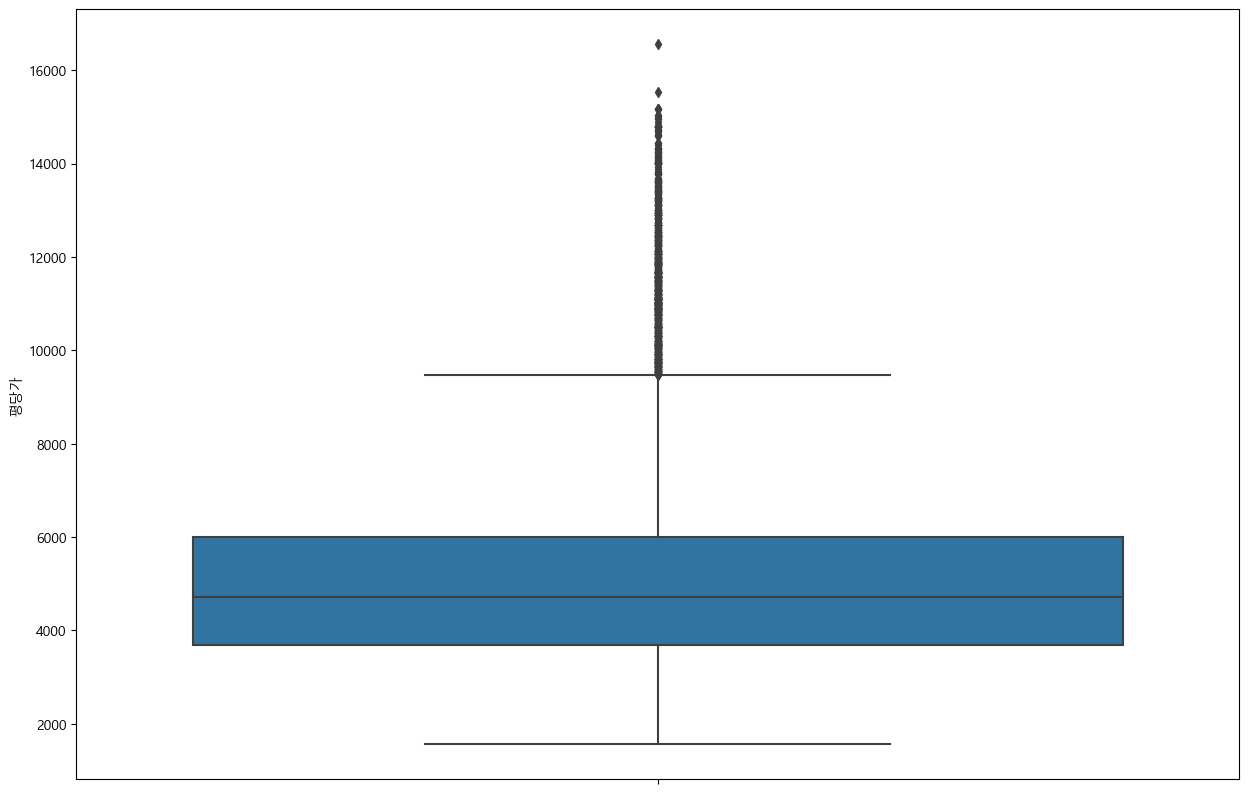

In [25]:
# 전체 이상치 확인

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(y='평당가',data=data)
#plt.xticks(rotation=90)
plt.show()

In [26]:
data_outlier_index = data[data['평당가'] > 10000].index
data.drop(index=data_outlier_index, inplace=True)

In [27]:
data.reset_index(drop=True, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17399 entries, 0 to 17398
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드                             17399 non-null  object 
 1   단지명                                 17399 non-null  object 
 2   층                                   17399 non-null  int64  
 3   건축년도                                17399 non-null  int64  
 4   건설수주_건축(단위 백만원)                     17399 non-null  float64
 5   건설수주_주택(단위 백만원)                     17399 non-null  float64
 6   매매가격지수(아파트)                         17399 non-null  float64
 7   경상수지(백만불)                           17399 non-null  float64
 8   무역수지(백만불)                           17399 non-null  float64
 9   대출금액(아파트)(억원)                       17399 non-null  float64
 10  대출잔액(아파트)(억원)                       17399 non-null  float64
 11  서울_신규_분양세대(단위: 세대)                  17399

In [29]:
data.drop(labels=['단지명'], axis=1, inplace=True)

In [30]:
data

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,평당가,클러스터링_구
0,래미안,8,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9647.193456,cluster 2
1,래미안,10,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9495.929741,cluster 2
2,래미안,9,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9457.011996,cluster 2
3,래미안,10,2019,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,2020,9922.827555,cluster 2
4,래미안,10,2019,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,2020,8951.081313,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,롯데캐슬,13,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,3476.293941,cluster 2
17395,롯데캐슬,22,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,3306.957161,cluster 2
17396,롯데캐슬,29,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,2022,5551.595387,cluster 2
17397,롯데캐슬,20,2011,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,2022,5058.120242,cluster 2


In [31]:
data.to_csv("top5_data_before_target_encoding.csv",index = False)

In [32]:
top5_data_before_target_encoding = pd.read_csv("top5_data_before_target_encoding.csv")
top5_data_before_target_encoding

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,평당가,클러스터링_구
0,래미안,8,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9647.193456,cluster 2
1,래미안,10,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9495.929741,cluster 2
2,래미안,9,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,9457.011996,cluster 2
3,래미안,10,2019,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,2020,9922.827555,cluster 2
4,래미안,10,2019,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,2020,8951.081313,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,롯데캐슬,13,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,3476.293941,cluster 2
17395,롯데캐슬,22,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,3306.957161,cluster 2
17396,롯데캐슬,29,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,2022,5551.595387,cluster 2
17397,롯데캐슬,20,2011,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,2022,5058.120242,cluster 2


In [33]:
data.columns

Index(['아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '평당가', '클러스터링_구'],
      dtype='object')

In [34]:
train = data[['아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '클러스터링_구']]
target = data[['평당가']]

In [35]:
train

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
0,래미안,8,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
1,래미안,10,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
2,래미안,9,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
3,래미안,10,2019,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,23293.899833,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,2020,cluster 2
4,래미안,10,2019,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,2020,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,롯데캐슬,13,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,cluster 2
17395,롯데캐슬,22,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,cluster 2
17396,롯데캐슬,29,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,31446.712798,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,2022,cluster 2
17397,롯데캐슬,20,2011,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,33009.564878,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,2022,cluster 2


In [36]:
target

,평당가
0,9647.193456
1,9495.929741
2,9457.011996
3,9922.827555
4,8951.081313
...,...
17394,3476.293941
17395,3306.957161
17396,5551.595387
17397,5058.120242


In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(10439, 42) (3480, 42) (3480, 42) (10439, 1) (3480, 1) (3480, 1)


In [38]:
!pip install category_encoders

In [39]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index) #object값 list에 넣음
categorical_features.append('계약연도')
# 추출된 문자열 변수 확인
display(categorical_features) #Target encoding 할 값 추출

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    X_train[i] = le.fit_transform(X_train[i], y_train)
    X_val[i] = le.transform(X_val[i], y_val)
    X_test[i] = le.transform(X_test[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(X_train)
display(X_test)

['아파트 브랜드', '서울_신규_분양세대(단위: 세대)', '계약연도', '클러스터링_구', '계약연도']

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
1198,5038.835134,18,2014,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.205,21047.34753,...,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,4494.530717,4269.529581
7697,4496.096162,12,2010,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4494.530717,3290.671647
15987,4691.866987,4,2005,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323
824,5038.835134,9,2004,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4494.530717,3290.671647
9821,4496.096162,1,2009,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.028,22748.79042,...,30821.352590,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,5401.199682,4346.144995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12564,4156.290208,7,2002,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.763,15562.04000,...,27821.367281,0.054406,1429.09,3.00,2326.17,3.41,848.24,4.04,4494.530717,5125.934323
3719,5038.835134,10,2006,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.447,22428.73394,...,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,4494.530717,4346.144995
940,5038.835134,11,2002,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.447,22428.73394,...,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,4494.530717,4269.529581
12744,4156.290208,13,2004,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4494.530717,5125.934323


,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
4074,5038.835134,3,1995,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.763,15562.04000,...,27821.367281,0.054406,1429.09,3.00,2326.17,3.41,848.24,4.04,4494.530717,5125.934323
1042,5038.835134,20,2019,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4494.530717,4269.529581
13209,4156.290208,7,2002,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.821,29943.84464,...,30148.579901,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4494.530717,5125.934323
16766,4691.866987,3,2003,13259062.0,6936574.0,98.1,6689.0,3948.0,27308.991,24377.97725,...,32373.291101,0.034822,1886.88,1.36,3061.42,1.61,956.17,4.62,5401.199682,5125.934323
10549,5391.935369,9,2015,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,5125.934323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,5038.835134,26,2015,15448828.0,8843858.0,100.0,9972.0,4350.0,18224.716,16643.16239,...,34289.906783,0.000572,1986.96,2.81,3296.68,2.90,1029.96,4.91,5401.199682,5125.934323
3016,5038.835134,8,2012,9765035.0,5656161.0,94.4,5826.0,4363.0,42474.385,32233.28116,...,22637.420810,-0.206254,1089.34,-10.76,1754.64,-11.69,569.07,-6.82,4494.530717,5710.042001
3532,5038.835134,9,2009,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,4346.144995
13700,4156.290208,9,2015,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4494.530717,5710.042001


In [40]:
X = pd.concat([X_train, X_test], axis=0)
X

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
1198,5038.835134,18,2014,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.205,21047.34753,...,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,4494.530717,4269.529581
7697,4496.096162,12,2010,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4494.530717,3290.671647
15987,4691.866987,4,2005,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323
824,5038.835134,9,2004,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4494.530717,3290.671647
9821,4496.096162,1,2009,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.028,22748.79042,...,30821.352590,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,5401.199682,4346.144995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,5038.835134,26,2015,15448828.0,8843858.0,100.0,9972.0,4350.0,18224.716,16643.16239,...,34289.906783,0.000572,1986.96,2.81,3296.68,2.90,1029.96,4.91,5401.199682,5125.934323
3016,5038.835134,8,2012,9765035.0,5656161.0,94.4,5826.0,4363.0,42474.385,32233.28116,...,22637.420810,-0.206254,1089.34,-10.76,1754.64,-11.69,569.07,-6.82,4494.530717,5710.042001
3532,5038.835134,9,2009,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,4346.144995
13700,4156.290208,9,2015,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4494.530717,5710.042001


In [41]:
data_target_encoding = pd.concat([X, target], axis=1, ignore_index=False)
data_target_encoding.sort_index(ascending=True, inplace=True)

In [42]:
data_target_encoding.dropna(axis=0,inplace=True)

In [43]:
data_target_encoding.isnull().sum()

아파트 브랜드                               0
층                                     0
건축년도                                  0
건설수주_건축(단위 백만원)                       0
건설수주_주택(단위 백만원)                       0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
소비자물가지수 주택, 수도, 전기 및 연료               0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0
주택매매가격지수(KB)_서울                       0


In [44]:
data_target_encoding_index = data_target_encoding.index
index = data.index

In [45]:
common_index = index.intersection(data_target_encoding_index)

In [46]:
data_target_encoding_without_null = data_target_encoding[data_target_encoding.index==common_index]

In [47]:
data_target_encoding_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13919 entries, 0 to 17398
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드                             13919 non-null  float64
 1   층                                   13919 non-null  float64
 2   건축년도                                13919 non-null  float64
 3   건설수주_건축(단위 백만원)                     13919 non-null  float64
 4   건설수주_주택(단위 백만원)                     13919 non-null  float64
 5   매매가격지수(아파트)                         13919 non-null  float64
 6   경상수지(백만불)                           13919 non-null  float64
 7   무역수지(백만불)                           13919 non-null  float64
 8   대출금액(아파트)(억원)                       13919 non-null  float64
 9   대출잔액(아파트)(억원)                       13919 non-null  float64
 10  서울_신규_분양세대(단위: 세대)                  13919 non-null  float64
 11  아파트 동(호)수_(단위: 호)                   13919

In [48]:
target

,평당가
0,9647.193456
1,9495.929741
2,9457.011996
3,9922.827555
4,8951.081313
...,...
17394,3476.293941
17395,3306.957161
17396,5551.595387
17397,5058.120242


In [49]:
target_without_null = target[target.index.isin(common_index)]

In [50]:
target_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13919 entries, 0 to 17398
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평당가     13919 non-null  float64
dtypes: float64(1)
memory usage: 217.5 KB


In [51]:
data_target_encoding_without_null.drop(labels=['평당가'], axis=1, inplace=True)

In [52]:
data_target_encoding = pd.concat([data_target_encoding_without_null, target_without_null], axis=1, ignore_index=False)

In [53]:
data_target_encoding

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구,평당가
0,5038.835134,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,5125.934323,9647.193456
1,5038.835134,10.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,5125.934323,9495.929741
3,5038.835134,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,4494.530717,5125.934323,9922.827555
4,5038.835134,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323,8951.081313
5,5038.835134,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,4691.866987,13.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5055.433365,5125.934323,3476.293941
17395,4691.866987,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5055.433365,5125.934323,3306.957161
17396,4691.866987,29.0,2011.0,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,5055.433365,5125.934323,5551.595387
17397,4691.866987,20.0,2011.0,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,5055.433365,5125.934323,5058.120242


In [54]:
data_target_encoding.reset_index(drop=True, inplace=True)

In [55]:
data_target_encoding.to_csv("top5_data_after_target_encoding.csv",index = False)

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_target_encoding_without_null.values, i) for i in range(data_target_encoding_without_null.shape[1])]
vif["features"] = data_target_encoding_without_null.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.022522e+00,클러스터링_구
1,1.023193e+00,층
2,1.027328e+00,아파트 브랜드
3,1.035205e+00,건축년도
4,1.268487e+02,KOSDAQ_change_rate
5,1.353303e+02,무역수지(백만불)
6,2.355949e+02,아파트 동(호)수_(단위: 호)
7,2.482464e+02,경상수지(백만불)
8,1.762757e+03,예금은행 대출금리(신규취급액 기준)_대출평균(연%)
9,2.630528e+03,건설수주_주택(단위 백만원)


In [57]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,1.022522,클러스터링_구
1,1.023193,층
2,1.027328,아파트 브랜드
3,1.035205,건축년도


In [58]:
scaler = StandardScaler()
X_std = scaler.fit_transform(data_target_encoding_without_null)
X_std =  pd.DataFrame(X_std, columns=data_target_encoding_without_null.columns)

In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_std.values, i) for i in range(X_std.shape[1])]
vif["features"] = X_std.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.022815e+00,클러스터링_구
1,1.023197e+00,층
2,1.027467e+00,아파트 브랜드
3,1.035375e+00,건축년도
4,1.329333e+02,경상수지(백만불)
5,1.306714e+03,무역수지(백만불)
6,1.727496e+03,서울_신규_분양세대(단위: 세대)
7,1.877833e+03,경제활동인구_ 실업률(단위: %)
8,2.093980e+03,전규모(1인이상) 전체임금총액[원]
9,2.200209e+03,예금은행 대출금리(신규취급액 기준)_대출평균(연%)


In [60]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,1.022815,클러스터링_구
1,1.023197,층
2,1.027467,아파트 브랜드
3,1.035375,건축년도


In [61]:
data_target_encoding

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구,평당가
0,5038.835134,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,5125.934323,9647.193456
1,5038.835134,10.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4494.530717,5125.934323,9495.929741
2,5038.835134,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,4494.530717,5125.934323,9922.827555
3,5038.835134,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323,8951.081313
4,5038.835134,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4494.530717,5125.934323,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13914,4691.866987,13.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5055.433365,5125.934323,3476.293941
13915,4691.866987,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5055.433365,5125.934323,3306.957161
13916,4691.866987,29.0,2011.0,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,5055.433365,5125.934323,5551.595387
13917,4691.866987,20.0,2011.0,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,5055.433365,5125.934323,5058.120242
